# 1장, 서울시 구별 CCTV 현황 분석

## 1-1 CCTV 현황과 인구 현황 데이터 구하기
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

## 1-2 파이썬에서 텍스트 파일과 엑셀 파일 읽기 - pandas

### CCTV_in_Seoul.csv 데이터 불러오기

In [3]:
Data_Path = '/content/drive/MyDrive/파이썬으로_데이터_주무르기/1장 서울시 구별 CCTV 현황 분석/data/'

In [4]:
CCTV_Seoul = pd.read_csv(Data_Path + '01. CCTV_in_Seoul.csv', encoding = 'utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### Column이름 변경하기

In [5]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [7]:
CCTV_Seoul.columns[0]

'기관명'

In [8]:
CCTV_Seoul.rename(columns = {CCTV_Seoul.columns[0] : '구별'}, inplace = True) # inplace = True 는, 실제 CCTV_Seoul이라는 "변수의 내용을 갱신"
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### population_in_Seoul.xls 데이터 불러오기

In [9]:
# pop_Seoul = pd.read_excel(Data_Path + '01. population_in_Seoul.xls')
# pop_Seoul.head()

- 오류를 검색해 보았더니, pandas openpyxl의 excel 관련 버전 충돌이라고 한다
- 위의 문제로 해결이 안됐고, 이번에는 xlrd 버전 관련 에러가 나서 업그레이드 후 '다시시작 및 모두실행'을 하니 문제가 해결 되었다.

여전히 의문1: 왜 이쪽은 encoding 관련 오류가 날까?

In [10]:
!pip install --upgrade xlrd #완료 후에 다시시작 및 모두실행을 하였다.

     |████████████████████████████████| 96 kB 2.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [11]:
pop_Seoul = pd.read_excel(Data_Path + '01. population_in_Seoul.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


엑셀 파일 자체의 head()가 저렇게 쓰여있기에, 이상하게 보인다.
때문에 ...

### 특정 '줄' 부터 읽고 // 특정 '열'만 읽기


In [12]:
pop_Seoul = pd.read_excel(Data_Path + '01. population_in_Seoul.xls',
                          header = 2,
                          usecols = 'B, D, G, J, N',)

pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### 이름을 새로 지정하기

In [13]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                            pop_Seoul.columns[1] : '인구수',
                            pop_Seoul.columns[2] : '한국인',
                            pop_Seoul.columns[3] : '외국인',
                            pop_Seoul.columns[4] : '고령자'}, inplace = True)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## 1-3 pandas 기초 익히기

In [14]:
import pandas as pd
import numpy as np

### Serise 만들기.
- 대괄호로 list를 생성하였습니다.
- `np.nan`을 넣어 NaN(Not a Number)도 넣었습니다. 

In [15]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

pandas에는 날짜형 데이터인 date_range가 있습니다.
- 기본 날짜를 지정하고 periods옵션으로 6일간으로 지정 하였습니다.

In [16]:
dates = pd.date_range('20130101', periods = 6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

DataFrame 유형의 데이터를 만듭니다.
- 6행 4열의 random변수를 만들었습니다.
- index에는 위에서 만든 날짜형 데이터인 dates를 넣었습니다.
- columns 에는 ['A', 'B', 'C', 'D'] 를 넣어주었습니다.

In [17]:
df = pd.DataFrame(np.random.randn(6,4), index = dates, columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959
2013-01-02,0.242658,1.463391,0.599707,-0.396945
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505
2013-01-04,-0.112616,0.487531,1.391183,0.728594
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283
2013-01-06,1.485141,2.466613,-0.504346,-0.590641


`head()` 라고하면 첫 5행만 보여주고, 괄호안에 숫자를 넣으면 그 만큼의 행을 볼 수 있습니다.

In [18]:
df.head(3)

,A,B,C,D
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959
2013-01-02,0.242658,1.463391,0.599707,-0.396945
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505


`index`, `columns` 명령을 이용하면, pandas의 DataFrame의 컬럼과 인덱스를 확인할 수 있습니다.

In [19]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [20]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

그리고 그 안에 들어가는 내용은 `value` 명령으로 확인할 수 있습니다. 

In [21]:
df.values

array([[-0.95798149, -1.0570258 ,  1.78378735, -1.18195889],
       [ 0.24265793,  1.46339112,  0.599707  , -0.39694486],
       [-1.08835015, -0.01860291, -0.15913113,  0.69850468],
       [-0.11261576,  0.48753135,  1.39118326,  0.72859358],
       [ 1.35126633, -0.26433914, -1.50874423, -0.26428261],
       [ 1.48514094,  2.46661348, -0.50434555, -0.59064098]])

또한, `.info()`명령을 사용하면 DataFrame의 개요를 알 수 있습니다.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


`describe()` 명령을 사용하면 통계적 개요를 확인할 수 있습니다.
- count와 평균, min, max, 1/4 지점, 표준편차까지 한 번에 알 수 있습니다.
- 이 때, values가 숫자가 아니라 문자라고 하더라도, 그에 맞는 개요가 나타납니다.

In [23]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.153353,0.512928,0.267076,-0.167788
std,1.101296,1.270617,1.233285,0.751417
min,-1.088350,-1.057026,-1.508744,-1.181959
25%,-0.746640,-0.202905,-0.418042,-0.542217
50%,0.065021,0.234464,0.220288,-0.330614
75%,1.074114,1.219426,1.193314,0.457808
max,1.485141,2.466613,1.783787,0.728594


`sort_values` 명령은, `by`로 지정된 컬럼을 기준으로 정렬합니다. 

`ascending`옵션을 사용하면, 내림차순이나 오름차순으로 정렬시킬 수 있습니다.
- (False = 내림차순, True = 오름차순)

In [24]:
df.sort_values(by='B', ascending = False)

,A,B,C,D
2013-01-06,1.485141,2.466613,-0.504346,-0.590641
2013-01-02,0.242658,1.463391,0.599707,-0.396945
2013-01-04,-0.112616,0.487531,1.391183,0.728594
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959


`변수명`을 적고, 실행을 하면 그 내용이 나타납니다.
- 위에서 sort를 저장한것이 아니기 때문에, 다시 원래의 표가 나옵니다.
- 내용이 너무 많은 경우에는 Jupyter Notebook에서 내용을 줄여서 보여줍니다.

In [25]:
df

,A,B,C,D
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959
2013-01-02,0.242658,1.463391,0.599707,-0.396945
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505
2013-01-04,-0.112616,0.487531,1.391183,0.728594
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283
2013-01-06,1.485141,2.466613,-0.504346,-0.590641


DataFrame으로 선언 된 변수의 경우 변수면 뒤에 `[columns명]`을 붙여주면 해당 칼럼만 Series로 보여줍니다.

In [26]:
df['A']

2013-01-01   -0.957981
2013-01-02    0.242658
2013-01-03   -1.088350
2013-01-04   -0.112616
2013-01-05    1.351266
2013-01-06    1.485141
Freq: D, Name: A, dtype: float64

중간부터 보고싶다면, 행의 범위만 지정해서 볼 수 있습니다

In [27]:
df[2:6]

,A,B,C,D
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505
2013-01-04,-0.112616,0.487531,1.391183,0.728594
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283
2013-01-06,1.485141,2.466613,-0.504346,-0.590641


특정 행만 지정해서 볼 수도 있습니다.

In [28]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.242658,1.463391,0.599707,-0.396945
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505
2013-01-04,-0.112616,0.487531,1.391183,0.728594


위에서 만든 dates 변수를 이용하여 특정 날짜의 데이터만 보고싶으면, `df.loc`명령을 사용합니다.
- loc는 location 옵션으로, 슬라이싱 할 때 loc옵션을 이용하여 위치 값을 지정할 수 있습니다.

In [29]:
print('dates[0] = ',dates[0],'\n','='*10,'\n')
df.loc[dates[0]] #dates[0] 의 행만 보여줍니다

dates[0] =  2013-01-01 00:00:00 



A   -0.957981
B   -1.057026
C    1.783787
D   -1.181959
Name: 2013-01-01 00:00:00, dtype: float64

A, B열의 모든 행을 보고 싶다면 `df.loc[:['A', 'B']]` 라고 하면 됩니다.

In [30]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.957981,-1.057026
2013-01-02,0.242658,1.463391
2013-01-03,-1.088350,-0.018603
2013-01-04,-0.112616,0.487531
2013-01-05,1.351266,-0.264339
2013-01-06,1.485141,2.466613


물론 행과 열의 범위를 모두 지정할 수도 있습니다.

In [31]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,0.242658,1.463391
2013-01-03,-1.088350,-0.018603
2013-01-04,-0.112616,0.487531


또한, 특정 일의 A,B 컬럼의 내용을 확인하는 것 입니다.

In [32]:
df.loc['20130102',['A','B']]

A    0.242658
B    1.463391
Name: 2013-01-02 00:00:00, dtype: float64

In [33]:
print(dates[1])

2013-01-02 00:00:00


In [34]:
df.loc[dates[1],'A']

0.2426579316953441

이번에는, loc 명령어에서는 `dates[3]`과 같이 접근을 하였지만, 행과 열 번호만 이요하여 바로 접근하고 싶을 수 있는데, 이때 사용하는 명령어가 `iloc` 입니다.

In [35]:
df.loc[dates[3]]

A   -0.112616
B    0.487531
C    1.391183
D    0.728594
Name: 2013-01-04 00:00:00, dtype: float64

In [36]:
df.iloc[3]

A   -0.112616
B    0.487531
C    1.391183
D    0.728594
Name: 2013-01-04 00:00:00, dtype: float64

In [37]:
df

,A,B,C,D
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959
2013-01-02,0.242658,1.463391,0.599707,-0.396945
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505
2013-01-04,-0.112616,0.487531,1.391183,0.728594
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283
2013-01-06,1.485141,2.466613,-0.504346,-0.590641


In [38]:
df.iloc[3:5,0:2] # 4~5번째 행의, 1~2번째 열

,A,B
2013-01-04,-0.112616,0.487531
2013-01-05,1.351266,-0.264339


In [39]:
df.iloc[[1,2,4,],[0,2]]

,A,C
2013-01-02,0.242658,0.599707
2013-01-03,-1.088350,-0.159131
2013-01-05,1.351266,-1.508744


In [40]:
df.iloc[1:3,:] # 1:3 행의, 전체 열

,A,B,C,D
2013-01-02,0.242658,1.463391,0.599707,-0.396945
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505


In [41]:
df.iloc[:,1:3] # 전체 행의, 1:3 열

,B,C
2013-01-01,-1.057026,1.783787
2013-01-02,1.463391,0.599707
2013-01-03,-0.018603,-0.159131
2013-01-04,0.487531,1.391183
2013-01-05,-0.264339,-1.508744
2013-01-06,2.466613,-0.504346


특정 조건에서 만족하는 데이터만 얻어보겠습니다. 
- `df.['A']` 처럼 할 수도 있고,
- `df.A` 처럼 할 수도 있습니다.


아래는 컬럼 A에서 0보다 큰 행만 얻는 것 입니다.

In [42]:
df

,A,B,C,D
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959
2013-01-02,0.242658,1.463391,0.599707,-0.396945
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505
2013-01-04,-0.112616,0.487531,1.391183,0.728594
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283
2013-01-06,1.485141,2.466613,-0.504346,-0.590641


In [43]:
df[df['A'] > 0] # A의 값이 0보다 큰 행만 출력

,A,B,C,D
2013-01-02,0.242658,1.463391,0.599707,-0.396945
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283
2013-01-06,1.485141,2.466613,-0.504346,-0.590641


In [44]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.242658,1.463391,0.599707,-0.396945
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283
2013-01-06,1.485141,2.466613,-0.504346,-0.590641


In [45]:
df[df > 0] # 전테 DataFrame에서 0보다 큰 값만 출력

,A,B,C,D
2013-01-01,NaN,NaN,1.783787,NaN
2013-01-02,0.242658,1.463391,0.599707,NaN
2013-01-03,NaN,NaN,NaN,0.698505
2013-01-04,NaN,0.487531,1.391183,0.728594
2013-01-05,1.351266,NaN,NaN,NaN
2013-01-06,1.485141,2.466613,NaN,NaN


[주의!!!]

DataFrame을 복사할 때는 그냥 `=` 기호를 이용해서 복사하면 실제 데이터의 내용이 복사되는것이 아니라, 데이터 위치만 복사되기 때문에, 원본 데이터는 하나만 있게 됩니다.

때문에, 내용까지 복사하라는 지령은 `copy()` 옵션을 붙여 넣으면 됩니다.

In [46]:
df_row = df.copy()
df_equal = df
df_copy = df.copy()

In [47]:
df_equal

,A,B,C,D
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959
2013-01-02,0.242658,1.463391,0.599707,-0.396945
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505
2013-01-04,-0.112616,0.487531,1.391183,0.728594
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283
2013-01-06,1.485141,2.466613,-0.504346,-0.590641


In [48]:
df_copy

,A,B,C,D
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959
2013-01-02,0.242658,1.463391,0.599707,-0.396945
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505
2013-01-04,-0.112616,0.487531,1.391183,0.728594
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283
2013-01-06,1.485141,2.466613,-0.504346,-0.590641


### 새로운 컬럼 추가하기

In [49]:
df_copy['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df_copy

,A,B,C,D,E
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959,one
2013-01-02,0.242658,1.463391,0.599707,-0.396945,one
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505,two
2013-01-04,-0.112616,0.487531,1.391183,0.728594,three
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283,four
2013-01-06,1.485141,2.466613,-0.504346,-0.590641,three


In [50]:
df

,A,B,C,D
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959
2013-01-02,0.242658,1.463391,0.599707,-0.396945
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505
2013-01-04,-0.112616,0.487531,1.391183,0.728594
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283
2013-01-06,1.485141,2.466613,-0.504346,-0.590641


In [51]:
df_equal['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df_equal

,A,B,C,D,E
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959,one
2013-01-02,0.242658,1.463391,0.599707,-0.396945,one
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505,two
2013-01-04,-0.112616,0.487531,1.391183,0.728594,three
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283,four
2013-01-06,1.485141,2.466613,-0.504346,-0.590641,three


In [52]:
df

,A,B,C,D,E
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959,one
2013-01-02,0.242658,1.463391,0.599707,-0.396945,one
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505,two
2013-01-04,-0.112616,0.487531,1.391183,0.728594,three
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283,four
2013-01-06,1.485141,2.466613,-0.504346,-0.590641,three


[주의] 원본까지 변해벼렸다 !!!!!

In [53]:
df = df_row.copy()
df

,A,B,C,D
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959
2013-01-02,0.242658,1.463391,0.599707,-0.396945
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505
2013-01-04,-0.112616,0.487531,1.391183,0.728594
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283
2013-01-06,1.485141,2.466613,-0.504346,-0.590641


In [54]:
df_copy

,A,B,C,D,E
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959,one
2013-01-02,0.242658,1.463391,0.599707,-0.396945,one
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505,two
2013-01-04,-0.112616,0.487531,1.391183,0.728594,three
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283,four
2013-01-06,1.485141,2.466613,-0.504346,-0.590641,three


아무튼, 이렇게 만든 E 컬럼에서 'two'와 'four'이 있는지 조건을 걸고 싶을 때는 isin 명령을 쓰면 좋습니다.

In [55]:
df_copy['E'].isin(['two', 'four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

그 결과는 True/False로 반환하는데, 이를 이용하여 조건에 맞는 데이터를 선택할 수 있습니다.

In [56]:
df_copy[df_copy['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505,two
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283,four


In [57]:
df

,A,B,C,D
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959
2013-01-02,0.242658,1.463391,0.599707,-0.396945
2013-01-03,-1.088350,-0.018603,-0.159131,0.698505
2013-01-04,-0.112616,0.487531,1.391183,0.728594
2013-01-05,1.351266,-0.264339,-1.508744,-0.264283
2013-01-06,1.485141,2.466613,-0.504346,-0.590641


### 통계적인 느낌을 볼 때는 `apply`명령을 넣으면 된다.
- 누적 합을 알고싶을 때는 numpy의 `cumsum`을 이용한다.

In [58]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-0.957981,-1.057026,1.783787,-1.181959
2013-01-02,-0.715324,0.406365,2.383494,-1.578904
2013-01-03,-1.803674,0.387762,2.224363,-0.880399
2013-01-04,-1.916289,0.875294,3.615546,-0.151805
2013-01-05,-0.565023,0.610955,2.106802,-0.416088
2013-01-06,0.920118,3.077568,1.602457,-1.006729


특별히 최댓값과 최솟값의 차이(혹은 거리)를 알고 싶다면 one-line함수인 `lambda`를 이용하면 됩니다.

In [59]:
df.apply(lambda x: x.max() - x.min())

A    2.573491
B    3.523639
C    3.292532
D    1.910552
dtype: float64

## 1-4 pandas를  이용해서 CCTV와 인구 현황 데이터 파악하기

In [60]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### 순서 정렬
- sort_values: values 중에서
- by = 어느 column을 기준으로 둘 건지
- ascending = 오름차순

In [61]:
CCTV_Seoul.sort_values(by = '소계',ascending = True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


- CCTV의 전체 개수가 가장 작은 구는 '도봉구', '마포구', '송파구', '중랑구,' 중구' 순 인것을 알 수 있다.
- 의아한 사실은, 강남 3구 중 하나인 송파구가 CCTV가 적은 구 중 하나라는 것인데, 2장에서 보면 송파구는 결코 범죄율이 낮은 구가 아니다.
- 하지만 CCTV가 적은 구 중 하나이다.

In [62]:
CCTV_Seoul.sort_values(by = '소계', ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


- 그리고 CCTV가 가장 많은 구는 '강남구', '양천구', '서초구', '은평구', '용산구' 로 나타난다.

2014 ~ 2016년 최근 3년간의 CCTV 수를 더하고, 2013년 이전 CCTV수로 나눠서 최근 3년의 CCTV 증가율을 계산해보겠습니다.

In [63]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100

CCTV_Seoul.sort_values(by = '최근증가율', ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


-  최근 3년간 CCTV가 그 이전 대비 가장 많이 증가한 구는 '종로구', '도봉구', '마포구', '노원구', '강동구' 순 임을 알 수 있습니다

이제, 서울시 인구 현황을 정리해 보겠습니다.

In [64]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


우선 필요없는 0번 행에 있는 합계를 `drop`명령을 사용해서 지워줍니다.

In [65]:
pop_Seoul.drop([0], inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


pop_Seoul데이터의 '구별' 컬럼의 `unique`를 조사합니다. 이는, 반복된 데이터를 하나로 나타내어 한번 이상 나타난 데이터를 확인합니다.

In [66]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

이렇게 하였더니, 끝에 NaN이 보입니다. 이 NaN이 어디있는지 확인하기 위해서는, `isnull`명령으로 데이터를 추출 할 수 있습니다.

In [67]:
pop_Seoul['구별'].isnull()

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

자동으로 bool을 output 하므로, 아래와 같이 작성하면 해당 행을 확인할 수 있습니다.

In [68]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


다시, 행을 지우는 `drop`명령어로, 해당 행을 삭제합니다.

In [69]:
pop_Seoul.drop([26],inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


이제 각 구별 전체 인구를 이용하여 구별 '외국인 비율', '고령자 비율'을 계산하겠습니다.

In [70]:
pop_Seoul['외국인 비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자 비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


비율 순위를 보기위해 정렬 해 보겠습니다
- 인구수 순

In [71]:
pop_Seoul.sort_values(by = '인구수', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


- 외국인 순

In [72]:
pop_Seoul.sort_values(by = '외국인', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


- 외국인 비율 순

In [73]:
pop_Seoul.sort_values(by = '외국인 비율', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


외국인의 숫자는 영등포, 구로, 금천, 관악, 동대문구 순으로 많지만,

외국인 비율은, 영등포, 금천구, 구로구, 중구, 용산구 순으로 조금 바뀌는 것을 알 수 있었습니다.

- 고령자 순

In [74]:
pop_Seoul.sort_values(by = '고령자', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


- 고령자 비율 순

In [75]:
pop_Seoul.sort_values(by = '고령자 비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


이 역시도

고령자는 강서구, 송파구, 은평구, 노원구, 관악구 순으로 많지만,

고령자 비율은 강북구, 종로구, 중구, 용상구, 서대문구 순으로 조금 바뀌는 것을 알 수 있었습니다

---

지금까지 확인 한 내용도 중요하지만, CCTV의 현황을 완전히 파악한 것 같지는 않습니다.

인구대비 CCTV현황 같은 내용을 확인하고 싶은데, 그러기 위해서는 두 데이터를 병합해야 합니다.

## 1-5 pandas 고급기능 - 두 DataFrame 병합하기

우선 pandas 의 고급 기능 중 하나를 알고 가야 한다고 합니다.

연습용 데이터 3개를 만들겠습니다.

In [76]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index = [0,1,2,3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index = [4,5,6,7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index = [8,9,10,11])

In [77]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [78]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [79]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


### 데이터를 열 방향으로 합치는 `concat`명령어

In [80]:
result = pd.concat([df1,df2,df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


`key` 옵션으로 다중 index를 구분 하여 level을 생성 할 수도 있다.

In [81]:
result = pd.concat([df1, df2, df3], keys = ['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [82]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [83]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [84]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

또 새로운 셋 df4 를 만들어 보겠습니다.

In [85]:
df4 = pd.DataFrame({'B':['B2','B3','B6','B7'],
                    'D':['D2','D3','D6','D7'],
                    'F':['F2','F3','F6','F7']},
                   index = [2,3,6,7])

데이터 다시 확인

In [86]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [87]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


### `axis = 1`로, 행 방향 추가하기

위 두 개를, `axis = 1` 옵션을 주어 `concat` 하면, index에 맞는, 행 방향으로 추가할 수 있습니다.

In [88]:
result = pd.concat([df1,df4], axis = 1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


### `join = 'inner'` 옵션으로 공통되지 않는 index 버리기

index를 기준으로 하였기 때문에, 값을 가질 수 없는 곳은 NaN이 저장됩니다. 

이 때, 공통된 index로 합치고, 공통되지 않은 index의 데이터는 버리도록 하는 옵션이 `join = 'inner'` 옵션입니다.

In [89]:
result = pd.concat([df1, df4], axis = 1, join = 'inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### `.reindex(df.index)` 옵션으로, 특정 df 인덱스에 맞추기

또한 `.reindex(df1.index)` 옵션으로 df1의 인덱스에 맞추도록 할 수도 있습니다.
> 이전 버전에서는 `join_axes = [df1.index]` 였는데, 변경되었다.

In [90]:
result = pd.concat([df1, df4], axis = 1).reindex(df1.index)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### `ignore_index = True` 로 새로운 index 부여하기 (열기준으로 합친다)

In [91]:
result = pd.concat([df1, df4], ignore_index = True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


다른 명령을 학습하기 위해 데이터 두 개를 더 만듭니다.
- left에는 'k4'가 있고,
- right에는 'k1'이 있습니다.

In [92]:
left = pd.DataFrame({'key': ['k0','k4','k2','k3'],
                     'A': ['A0','A1','A2','A3'],
                     'B': ['B0','B1','B2','B3']})

right = pd.DataFrame({'key': ['k0','k1','k2','k3'],
                     'C': ['C0','C1','C2','C3'],
                     'D': ['D0','D1','D2','D3']})

In [93]:
left

,key,A,B
0,k0,A0,B0
1,k4,A1,B1
2,k2,A2,B2
3,k3,A3,B3


In [94]:
right

,key,C,D
0,k0,C0,D0
1,k1,C1,D1
2,k2,C2,D2
3,k3,C3,D3


## `merge` 하기

`on`을 'key'로 두면, 공통된 key를 기준으로 하게 됩니다.

In [95]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k2,A2,B2,C2,D2
2,k3,A3,B3,C3,D3


`how` 옵션으로, 한쪽 데이터만 적용할 수도 있습니다.

In [96]:
pd.merge(left, right, how = 'left', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k4,A1,B1,NaN,NaN
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


In [97]:
pd.merge(left, right, how = 'right', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,NaN,NaN,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


`how = outer` 옵션으로, **합집합** 처럼 합칠 수도 있습니다. 공통 된 요소가 아닌곳은 NaN 처리가 됩니다.

In [98]:
pd.merge(left, right, how = 'outer', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k4,A1,B1,NaN,NaN
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3
4,k1,NaN,NaN,C1,D1


`how = inner` 옵션으로, **교집합** 처럼 공통 요소만 합칠 수도 있습니다. (아마 디폴드 값인듯?)

In [99]:
pd.merge(left, right, how = 'inner', on = 'key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k2,A2,B2,C2,D2
2,k3,A3,B3,C3,D3


## 1-6 CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

위에서 배운대로, 두 데이터를 `merge` 해 보겠습니다.

In [100]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [101]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


'구별' 을 기준으로 `merge` 하면 될것 같습니다.

In [102]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### `del` 혹은 `drop` 명령어로 의미없는 컬럼 지우기
- `del` - 열 방향으로 삭제 (   ex) 칼럼 한 열을 빼고 싶을 때)
- `drop` - 행 방향으로 삭제 (  ex) 강남구 행을 빼고싶을 때)

In [103]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


나중에 그래프를 그릴 것을 생각하면, index는 구 이름이 되면 유리합니다.

In [104]:
data_result.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

때문에, `set_index`를 사용하여 inex를 바꾸어 줍니다.

In [105]:
data_result.set_index('구별', inplace = True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [106]:
data_result.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='구별')

### 상관계수 조사하기

- 무슨 데이터와 CCTV를 비교할지 정해야하는데, 그 중 가장 단순한 작업이 상관계수를 조사하는 것 입니다.
- 상관계수의 절대값이 클 수록 두 데이터는 관계가 있다고 볼 수 있습니다.
- 위키백과의 '상관분석 문서'에 의하면, 절대값이 0.1 이하면 거의 무시, 0.3이하면 약한 상관관계, 0.7이하면 뚜렷한 상관관계라고 합니다.


상관관계를 어떻게 계산하는지
### numpy에 있는 `corrcoef` 명령어
- 이 명령어의 결과는 행렬로 나타냅니다.
- 주 대각선을 기준으로 대칭인 행렬이며, 대각선을 뺀 다른 값을 읽으면 됩니다.

In [108]:
np.corrcoef(data_result['고령자 비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

CCTV개수와 고령자비율은 약한 음의 상관관계입니다.

In [109]:
np.corrcoef(data_result['외국인 비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

CCTV개수와 외국인 비율과는 큰 의미가 없다고 할 수 있습니다.

In [110]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

인구수와의 상관계수는 0.3 정도로, 약한 상관관계가 있다고 볼 수 있습니다.

CCTV 와 인구수의 관계를 조금 더 들여다보겠습니다.

In [111]:
data_result.sort_values(by = '소계', ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [112]:
data_result.sort_values(by = '인구수', ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


인구수가 많은 구를 시각적으로 비교하면 좋을 듯 합니다.

## 1-7. 파이썬의 대표 시각화 도구 - Matplotlib
- Matplotlib는 많은 내용이 있는데, 그 중 그래프를 그리는 모듈이 `matplotlib.pyplot`입니다.

- `%matplotlib inline`명령은, 결과르 출력 세션에서 나타내게 하는 설정입니다.

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

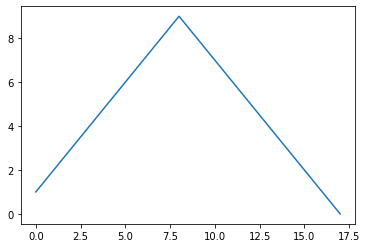

In [130]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

너무 단순하니, numpy를 이용하여 sin을 만들고 그려보겠습니다.
- `np.arange(a,b,n)`: a부터, b까지 n간격으로 테이블을 만듭니다

In [137]:
import numpy as np
t = np.arange(0,12, 0.01) #0.12 부터, 0.01 간격으로 테이블을 만듭니다.
# 약 1200개의 값을 가진 일종의 배열

y = np.sin(t) #t를 x값으로 갖는 sin생성

print(len(t))
print(len(y))

1200
1200


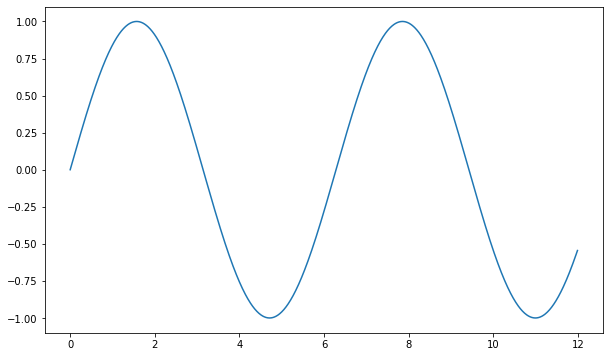

In [139]:
plt.figure(figsize = (10,6)) #도화지의 크기
plt.plot(t,y)
plt.show()

### 그래프 좀 더 꾸미기
- `xlabel` : x축 라벨
- `ylabel` : y축 라벨
- `title` : 제목
- `grid()` : 격자무늬


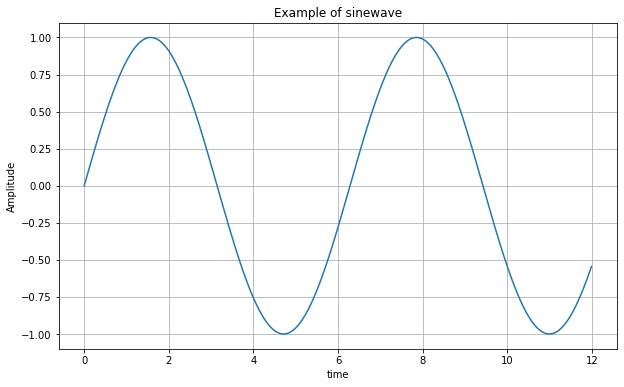

In [140]:
plt.figure(figsize = (10,6))
plt.plot(t,y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()